## NumPy Basics: Arrays and Vectorized Computation



### Introduction



NumPy, short for Numerical Python, is one of the most important
foundational packages for numerical computing in Python. 



In [1]:
import numpy as np
np.random.seed(2255)
import matplotlib.pyplot as plt

Here are some of the things in NumPy:

-   ndarray, an efficient multidimensional array providing fast
    array-oriented arithmetic operations and flexible *broadcasting*
    capabilities;
-   Mathematical functions for fast operations on entire arrays of data
    without having to write loops;
-   Tools for reading/writing array data to disk and working with
    memory-mapped files;
-   Linear algebra, random number generation, and Fourier transform
    capabilities;
-   A C API for connecting NumPy with libraries written in C, C++, or
    FORTRAN.

To see the performance difference, consider a NumPy array of one million integers, and the equivalent Python list



In [2]:
my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

Now let's multiply each sequence by 2:



In [3]:
import time

start = time.time()
my_arr2 = my_arr * 2 
print(time.time() - start)

start = time.time()
my_list2 = [x * 2 for x in my_list]
print(time.time() - start)

0.0054929256439208984
0.031707048416137695


NumPy-based algorithms are generally 10 to 100 times faster (or more)
than their pure Python counterparts and use significantly less memory.



### The NumPy ndarray: A Multidimensional Array

One of the key features of NumPy is its N-dimensional array object, or
ndarray, which is a fast, flexible container for large datasets in
Python. Arrays enable you to perform mathematical operations on whole
blocks of data using similar syntax to the equivalent operations between
scalar elements.



In [4]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

Mathematical operations with `data`:



In [5]:
L = [[1.5, -0.1, 3], [0, -3, 6.5]]
L

[[1.5, -0.1, 3], [0, -3, 6.5]]

In [6]:
L * 2

[[1.5, -0.1, 3], [0, -3, 6.5], [1.5, -0.1, 3], [0, -3, 6.5]]

In [7]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [8]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [9]:
L + L

[[1.5, -0.1, 3], [0, -3, 6.5], [1.5, -0.1, 3], [0, -3, 6.5]]

-   An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type.
-   Every array has a `shape`, a tuple indicating the size of each dimension, and a `dtype`, an object describing the *data type* of the array:



In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

#### Creating



The easiest way to create an array is to use the `array` function. This
accepts any sequence-like object (including other arrays) and produces a
new NumPy array containing the passed data. For example, a list is a
good candidate for conversion:



In [12]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted
into a multidimensional array:



In [13]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since `data2` was a list of lists, the NumPy array `arr2` has two
dimensions, with shape inferred from the data. We can confirm this by
inspecting the `ndim` and `shape` attributes:



In [14]:
arr2.ndim

2

In [15]:
arr2.shape

(2, 4)

Unless explicitly specified, `numpy.array` tries to infer a good data type for the array
that it creates. The data type is stored in a special `dtype` metadata
object; for example, in the previous two examples we have:



In [16]:
arr1.dtype

dtype('float64')

In [17]:
arr2.dtype

dtype('int64')

In addition to `numpy.array`, there are a number of other functions for
creating new arrays. As examples, `numpy.zeros` and `numpy.ones` create
arrays of 0s or 1s, respectively, with a given length or shape.
`numpy.empty` creates an array without initializing its values to any
particular value. To create a higher dimensional array with these
methods, pass a tuple for the shape:



In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
np.empty((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [21]:
np.empty((2, 3, 70))

array([[[0.00000000e+000, 2.45246866e-314, 0.00000000e+000,
         2.12199582e-314, 0.00000000e+000, 0.00000000e+000,
         2.45246864e-314, 2.45246865e-314, 2.12199580e-314,
         0.00000000e+000, 3.95252517e-323, 2.12199579e-314,
         1.90979621e-313, 0.00000000e+000, 0.00000000e+000,
         2.17536845e-314, 2.12199579e-314, 2.14491815e-314,
         2.26083638e-314, 1.48539705e-313, 2.76676762e-322,
         0.00000000e+000, 2.26083638e-314, 2.12199579e-314,
         2.14491816e-314, 2.26083638e-314, 6.36598737e-314,
         5.53353523e-322, 0.00000000e+000, 4.24399158e-314,
         2.12199579e-314, 2.14491818e-314, 2.26083638e-314,
         1.90979621e-313, 8.30030285e-322, 3.95252517e-323,
         6.01346953e-154, 2.12199579e-314, 2.14491819e-314,
         2.26083638e-314, 1.90979621e-313, 1.10670705e-321,
         7.35952325e+223, 9.28601695e+242, 6.36598738e-314,
         2.14491823e-314, 2.26083638e-314, 1.90979621e-313,
         1.38338381e-321, 5.92878775e-32

It's not safe to assume that `numpy.empty` will return an array of all
zeros. This function returns uninitialized memory and thus may contain
nonzero "garbage" values. You should use this function only if you
intend to populate the new array with data.

`numpy.arange` is an array-valued version of the built-in Python `range`
function:



In [22]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Here is a short list of standard array creation functions. Since NumPy is
focused on numerical computing, the data type, if not specified, will in
many cases be `float64` (floating point).


| Function|Description|
|---|---|
| <code>array</code>|Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a data type or explicitly specifying a data type; copies the input data by default|
| <code>asarray</code>|Convert input to ndarray, but do not copy if the input is already an ndarray|
| <code>arange</code>|Like the built-in <code>range</code> but returns an ndarray instead of a list|
| <code>ones, ones_like</code>|Produce an array of all 1s with the given shape and data type; <code>ones_like</code> takes another array and produces a <code>ones</code> array of the same shape and data type|
| <code>zeros, zeros_like</code>|Like <code>ones</code> and <code>ones_like</code> but producing arrays of 0s instead|
| <code>empty, empty_like</code>|Create new arrays by allocating new memory, but do not populate with any values like <code>ones</code> and <code>zeros</code>|
| <code>full, full_like</code>|Produce an array of the given shape and data type with all values set to the indicated "fill value"; <code>full_like</code> takes another array and produces a filled array of the same shape and data type|
| <code>eye, identity</code>|Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)|



#### Data Types

The *data type* or `dtype` is a special object containing the
information (or *metadata*, data about data) the ndarray needs to
interpret a chunk of memory as a particular type of data:



In [25]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

Data types are a source of NumPy's flexibility for interacting with data
coming from other systems. In most cases they provide a mapping directly
onto an underlying disk or memory representation, which makes it
possible to read and write binary streams of data to disk and to connect
to code written in a low-level language like C or FORTRAN. The numerical
data types are named the same way: a type name, like `float` or `int`,
followed by a number indicating the number of bits per element. A
standard double-precision floating-point value (what's used under the
hood in Python's `float` object) takes up 8 bytes or 64 bits. Thus, this
type is known in NumPy as `float64`.

Here is a full listing of NumPy's supported data types.


| Type|Type code|Description|
|---|---|---|
| <code>int8, uint8</code>|<code>i1, u1</code>|Signed and unsigned 8-bit (1 byte) integer types|
| <code>int16, uint16</code>|<code>i2, u2</code>|Signed and unsigned 16-bit integer types|
| <code>int32, uint32</code>|<code>i4, u4</code>|Signed and unsigned 32-bit integer types|
| <code>int64, uint64</code>|<code>i8, u8</code>|Signed and unsigned 64-bit integer types|
| <code>float16</code>|<code>f2</code>|Half-precision floating point|
| <code>float32</code>|<code>f4 or f</code>|Standard single-precision floating point; compatible with C float|
| <code>float64</code>|<code>f8 or d</code>|Standard double-precision floating point; compatible with C double and Python <code>float</code> object|
| <code>float128</code>|<code>f16 or g</code>|Extended-precision floating point|
| <code>complex64</code>, <code>complex128</code>, <code>complex256</code>|<code>c8, c16, c32</code>|Complex numbers represented by two 32, 64, or 128 floats, respectively|
| <code>bool</code>|?|Boolean type storing <code>True</code> and <code>False</code> values|
| <code>object</code>|O|Python object type; a value can be any Python object|
| <code>string_</code>|S|Fixed-length ASCII string type (1 byte per character); for example, to create a string data type with length 10, use <code>'S10'</code>|
| <code>unicode_</code>|U|Fixed-length Unicode type (number of bytes platform specific); same specification semantics as <code>string_</code> (e.g., <code>'U10'</code>)|

You can explicitly convert or *cast* an array from one data type to
another using ndarray's `astype` method:



In [26]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [27]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [28]:
float_arr.dtype

dtype('float64')

In [29]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [30]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use
`astype` to convert them to numeric form:



In [31]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [32]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

Be cautious when using the `numpy.string_` type, as string data in NumPy
is fixed size and may truncate input without warning. pandas has more
intuitive out-of-the-box behavior on non-numeric data.

You can also use another array's `dtype` attribute:



In [36]:
int_array = np.arange(10)
int_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
calibers

array([0.22 , 0.27 , 0.357, 0.38 , 0.44 , 0.5  ])

In [37]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [38]:
calibers.dtype

dtype('float64')

#### Arithmetic with NumPy



Arrays are important because they enable you to express batch operations
on data without writing any `for` loops. NumPy users call this
*vectorization*. Any arithmetic operations between equal-size arrays
apply the operation element-wise:



In [39]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [40]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [41]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each
element in the array:



In [42]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [43]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

Comparisons between arrays of the same size yield Boolean arrays:



In [44]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [45]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

#### Basic Indexing and slicing

NumPy array indexing is a deep topic, as there are many ways you may
want to select a subset of your data or individual elements.
One-dimensional arrays are simple; on the surface they act similarly to
Python lists:



In [46]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
arr[5]

5

In [48]:
arr[5:8]

array([5, 6, 7])

In [49]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in
`arr[5:8] = 12`, the value is propagated (or *broadcast* henceforth) to
the entire selection.

An important first distinction from Python's built-in lists is that
array slices are views on the original array. This means that the data
is not copied, and any modifications to the view will be reflected in
the source array.

To give an example of this, I first create a slice of `arr`:



In [50]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Now, when I change values in `arr_slice`, the mutations are reflected in
the original array `arr`:



In [51]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The "bare" slice `[:]` will assign to all values in an array:



In [52]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you are new to NumPy, you might be surprised by this, especially if
you have used other array programming languages that copy data more
eagerly. As NumPy has been designed to be able to work with very large
arrays, you could imagine performance and memory problems if NumPy
insisted on always copying data.

If you want a copy of a slice of an ndarray instead of a view, you will
need to explicitly copy the array&#x2014;for example, `arr[5:8].copy()`. As
you will see, pandas works this way, too.

With higher dimensional arrays, you have many more options. In a
two-dimensional array, the elements at each index are no longer scalars
but rather one-dimensional arrays:



In [53]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [54]:
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit
too much work, so you can pass a comma-separated list of indices to
select individual elements. So these are equivalent:



In [55]:
arr2d[0][2]

3

In [56]:
arr2d[0, 2]

3

![img](./figures/pda3_0401.png)

In multidimensional arrays, if you omit later indices, the returned
object will be a lower dimensional ndarray consisting of all the data
along the higher dimensions. So in the 2 × 2 × 3 array `arr3d`:



In [57]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

`arr3d[0]` is a 2 × 3 array:



In [58]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to `arr3d[0]`:



In [59]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [60]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, `arr3d[1, 0]` gives you all of the values whose indices start
with `(1, 0)`, forming a one-dimensional array:



In [61]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:



In [62]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

Note that in all of these cases where subsections of the array have been
selected, the returned arrays are views.

This multidimensional indexing syntax for NumPy arrays will not work
with regular Python objects, such as lists of lists.



##### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be
sliced with the familiar syntax:



In [63]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

Consider the two-dimensional array from before, `arr2d`. Slicing this
array is a bit different:



In [64]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [65]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis. A slice,
therefore, selects a range of elements along an axis. It can be helpful
to read the expression `arr2d[:2]` as "select the first two rows of
`arr2d`."

You can pass multiple slices just like you can pass multiple indexes:



In [66]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number
of dimensions. By mixing integer indexes and slices, you get lower
dimensional slices.

For example, I can select the second row but only the first two columns,
like so:



In [69]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [74]:
lower_dim_slice = arr2d[1, :2]
lower_dim_slice

array([4, 5])

Here, while `arr2d` is two-dimensional, `lower_dim_slice` is
one-dimensional, and its shape is a tuple with one axis size:



In [75]:
lower_dim_slice.shape

(2,)

Similarly, I can select the third column but only the first two rows,
like so:



In [76]:
arr2d[:2, 2]

array([3, 6])

Note that a colon by itself means to take the
entire axis, so you can slice only higher dimensional axes by doing:



In [77]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [80]:
arr2d[:, 1]

array([2, 5, 8])

In [79]:
arr2d[:, [0]]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole
selection:



In [81]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

![img](./figures/pda3_0402.png)



#### Boolean



Let's consider an example where we have some data in an array and an
array of names with duplicates:



In [82]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [83]:
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Suppose each name corresponds to a row in the `data` array and we wanted
to select all the rows with the corresponding name `"Bob"`. Like
arithmetic operations, comparisons (such as `==`) with arrays are also
vectorized. Thus, comparing `names` with the string `"Bob"` yields a
Boolean array:



In [84]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

This Boolean array can be passed when indexing the array:



In [85]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [86]:
names[names == "Bob"]

array(['Bob', 'Bob'], dtype='<U4')

The Boolean array must be of the same length as the array axis it's
indexing. You can even mix and match Boolean arrays with slices or
integers (or sequences of integers; more on this later).

In these examples, I select from the rows where `names =` "Bob"= and
index the columns, too:



In [87]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [89]:
data[names == "Bob", 1]

array([7, 0])

To select everything but `"Bob"` you can either use `!=` or negate the
condition using `~`:



In [90]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [92]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [93]:
data[names != "Bob"]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

The `~` operator can be useful when you want to invert a Boolean array
referenced by a variable:



In [94]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

To select two of the three names to combine multiple Boolean conditions,
use Boolean arithmetic operators like `&` (and) and `|` (or):



In [95]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [96]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

Selecting data from an array by Boolean indexing and assigning the
result to a new variable *always* creates a copy of the data, even if
the returned array is unchanged.

The Python keywords `and` and `or` do not work with Boolean arrays. Use
`&` (and) and `|` (or) instead.

Setting values with Boolean arrays works by substituting the value or
values on the righthand side into the locations where the Boolean
array's values are `True`. To set all of the negative values in `data`
to 0, we need only do:



In [97]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

You can also set whole rows or columns using a one-dimensional Boolean
array:



In [98]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

As we will see later, these types of operations on two-dimensional data
are convenient to do with pandas.



#### Fancy indexing

*Fancy indexing* is a term adopted by NumPy to describe indexing using
integer arrays. Suppose we had an 8 × 4 array:



In [99]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select a subset of the rows in a particular order, you can simply
pass a list or ndarray of integers specifying the desired order:



In [100]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Hopefully this code did what you expected! Using negative indices
selects rows from the end:



In [101]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it
selects a one-dimensional array of elements corresponding to each tuple
of indices:



In [102]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [103]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements `(1, 0), (5, 3), (7, 1)`, and `(2, 2)` were selected.
The result of fancy indexing with as many integer arrays as there are
axes is always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what
some users might have expected, which is the
rectangular region formed by selecting a subset of the matrix's rows and
columns. Here is one way to get that:



In [106]:
x = arr[[1, 5, 7, 2]]
x

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [107]:
x[:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [108]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data
into a new array when assigning the result to a new variable. If you
assign values with fancy indexing, the indexed values will be modified:



In [109]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

#### Transposing Arrays and Swapping



Transposing is a special form of reshaping that similarly returns a view
on the underlying data without copying anything. Arrays have the
`transpose` method and the special `T` attribute:



In [110]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [111]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often&#x2014;for
example, when computing the inner matrix product using `numpy.dot`:



In [112]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [114]:
arr.T

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

In [113]:
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

The `@` infix operator is another way to do matrix multiplication:



In [115]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

Simple transposing with `.T` is a special case of swapping axes. ndarray
has the method `swapaxes`, which takes a pair of axis numbers and
switches the indicated axes to rearrange the data:



In [117]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [116]:
arr.swapaxes(0, 1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

`swapaxes` similarly returns a view on the data without making a copy.



### Pseudorandom Number



The `numpy.random` module supplements the built-in Python `random`
module with functions for efficiently generating whole arrays of sample
values from many kinds of probability distributions. For example, you
can get a 4 × 4 array of samples from the standard normal distribution
using `numpy.random.standard_normal`:



In [118]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[ 0.11155009,  0.93165991,  0.98594645,  1.96368997],
       [-1.07899697,  0.63125455,  0.55619786,  0.45388409],
       [-1.95283347,  0.55808707, -0.08721455, -0.90218119],
       [ 0.86433933, -1.12917924, -0.18582244,  1.24985018]])

Python's built-in `random` module, by contrast, samples only one value
at a time. As you can see from this benchmark, `numpy.random` is well
over an order of magnitude faster for generating very large samples:



In [119]:
def random_exp(theta = 1):
    U = np.random.uniform()
    return(-theta * np.log(1 - U))
    
def random_Laplace():
    T = random_exp()
    U = np.random.uniform()
    if U > 0.5:
        return T
    else:
        return -T

def random_normal(mu=0, sigma=1):
    while True:
        U = np.random.uniform()
        X = random_Laplace()
        if U * ((1/((2*np.pi)**0.5)) * np.exp(0.5 - abs(X))) <= ((1/((2*np.pi)**0.5)) * np.exp(-X**2 / 2)):
            return sigma * X + mu

In [120]:
from random import normalvariate
N = 1_000_000

start = time.time()
samples = [random_normal() for _ in range(N)]
print(time.time() - start)

start = time.time()
samples = [normalvariate(0, 1) for _ in range(N)]
print(time.time() - start)

start = time.time()
np.random.standard_normal(N)
print(time.time() - start)

6.010757207870483
0.30835986137390137
0.015435934066772461


These random numbers are not truly random (rather, *pseudorandom*) but
instead are generated by a configurable random number generator that
determines deterministically what values are created. Functions like
`numpy.random.standard_normal` use the `numpy.random` module's default
random number generator, but your code can be configured to use an
explicit generator:



In [132]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
data

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

The `seed` argument is what determines the initial state of the
generator, and the state changes each time the `rng` object is used to
generate data. The generator object `rng` is also isolated from other
code which might use the `numpy.random` module:



In [ ]:
type(rng)

Here is a partial list of methods available on random generator objects like
`rng`.


| Method|Description|
|---|---|
| <code>permutation</code>|Return a random permutation of a sequence, or return a permuted range|
| <code>shuffle</code>|Randomly permute a sequence in place|
| <code>uniform</code>|Draw samples from a uniform distribution|
| <code>integers</code>|Draw random integers from a given low-to-high range|
| <code>standard_normal</code>|Draw samples from a normal distribution with mean 0 and standard deviation 1|
| <code>binomial</code>|Draw samples from a binomial distribution|
| <code>normal</code>|Draw samples from a normal (Gaussian) distribution|
| <code>beta</code>|Draw samples from a beta distribution|
| <code>chisquare</code>|Draw samples from a chi-square distribution|
| <code>gamma</code>|Draw samples from a gamma distribution|
| <code>uniform</code>|Draw samples from a uniform [0, 1) distribution|



### Universal Functions: Fast Element-Wise Array



A universal function, or *ufunc*, is a function that performs
element-wise operations on data in ndarrays. You can think of them as
fast vectorized wrappers for simple functions that take one or more
scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like `numpy.sqrt`
or `numpy.exp`:



In [133]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [134]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [135]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as *unary* ufuncs. Others, such as `numpy.add` or
`numpy.maximum`, take two arrays (thus, *binary* ufuncs) and return a
single array as the result:



In [136]:
x = rng.standard_normal(8)
x

array([-1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306,  2.34740965,
        0.96849691, -0.75938718,  0.90219827])

In [137]:
y = rng.standard_normal(8)
y

array([-0.46695317, -0.06068952,  0.78884434, -1.25666813,  0.57585751,
        1.39897899,  1.32229806, -0.29969852])

In [138]:
np.maximum(x, y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

In this example, `numpy.maximum` computed the element-wise maximum of
the elements in `x` and `y`.

While not common, a ufunc can return multiple arrays. `numpy.modf` is
one example: a vectorized version of the built-in Python `math.modf`, it
returns the fractional and integral parts of a floating-point array:



In [139]:
arr = rng.standard_normal(7) * 5
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [140]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.51459671, -0.10791367, -0.7909463 ,  0.24741966, -0.71800536,
       -0.40843795,  0.62369966])

In [141]:
whole_part

array([ 4., -8., -0.,  2., -6., -0.,  8.])

Ufuncs accept an optional `out` argument that allows them to assign
their results into an existing array rather than create a new one:



In [142]:
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [146]:
out1 = np.add(arr, 1)
out1

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [144]:
out = np.zeros_like(arr)
out

array([0., 0., 0., 0., 0., 0., 0.])

In [145]:
np.add(arr, 1, out=out)
out

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

Here are two lists of some of NumPy' ufuncs. New ufuncs continue to be added
to NumPy, so consulting the online NumPy documentation is the best way
to get a comprehensive listing and stay up to date.


| Function|Description|
|---|---|
| <code>abs, fabs</code>|Compute the absolute value element-wise for integer, floating-point, or complex values|
| <code>sqrt</code>|Compute the square root of each element (equivalent to <code>arr ** 0.5</code>)|
| <code>square</code>|Compute the square of each element (equivalent to <code>arr ** 2</code>)|
| <code>exp</code>|Compute the exponent e<sup>x</sup> of each element|
| <code>log, log10, log2, log1p</code>|Natural logarithm (base <i>e</i>), log base 10, log base 2, and log(1 + x), respectively|
| <code>sign</code>|Compute the sign of each element: 1 (positive), 0 (zero), or &#x2013;1 (negative)|
| <code>ceil</code>|Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number)|
| <code>floor</code>|Compute the floor of each element (i.e., the largest integer less than or equal to each element)|
| <code>rint</code>|Round elements to the nearest integer, preserving the <code>dtype</code>|
| <code>modf</code>|Return fractional and integral parts of array as separate arrays|
| <code>isnan</code>|Return Boolean array indicating whether each value is <code>NaN</code> (Not a Number)|
| <code>isfinite, isinf</code>|Return Boolean array indicating whether each element is finite (non-<code>inf</code>, non-<code>NaN</code>) or infinite, respectively|
| <code>cos, cosh, sin, sinh, tan, tanh</code>|Regular and hyperbolic trigonometric functions|
| <code>arccos, arccosh, arcsin, arcsinh, arctan, arctanh</code>|Inverse trigonometric functions|
| <code>logical_not</code>|Compute truth value of <code>not</code> <code>x</code> element-wise (equivalent to <code>~arr</code>)|


| Function|Description|
|---|---|
| <code>add</code>|Add corresponding elements in arrays|
| <code>subtract</code>|Subtract elements in second array from first array|
| <code>multiply</code>|Multiply array elements|
| <code>divide, floor_divide</code>|Divide or floor divide (truncating the remainder)|
| <code>power</code>|Raise elements in first array to powers indicated in second array|
| <code>maximum, fmax</code>|Element-wise maximum; <code>fmax</code> ignores <code>NaN</code>|
| <code>minimum, fmin</code>|Element-wise minimum; <code>fmin</code> ignores <code>NaN</code>|
| <code>mod</code>|Element-wise modulus (remainder of division)|
| <code>copysign</code>|Copy sign of values in second argument to values in first argument|
| <code>greater, greater_equal, less, less_equal, equal, not_equal</code>|Perform element-wise comparison, yielding Boolean array (equivalent to infix operators <code>&gt;, &gt;</code>, &lt;, &lt;=, <code>=, !=</code>)|
| <code>logical_and</code>|Compute element-wise truth value of AND (<code>&amp;</code>) logical operation|
| <code>logical_or</code>|Compute element-wise truth value of OR (=|=) logical operation|
| <code>logical_xor</code>|Compute element-wise truth value of XOR (<code>^</code>) logical operation|



### Array-Oriented Programming with Arrays

-   Using NumPy arrays enables you to express many kinds of data processing
    tasks as concise array expressions that might otherwise require writing
    loops. 
    -   This practice of replacing explicit loops with array expressions is referred to by some people as *vectorization*.
    -   In general, vectorized array operations will usually be significantly faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.

As a simple example, suppose we wished to evaluate the function
`sqrt(x^2 + y^2)` across a regular grid of values.
The `numpy.meshgrid`
function takes two one-dimensional arrays and produces two
two-dimensional matrices corresponding to all pairs of `(x, y)` in the
two arrays:



In [147]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [148]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression
you would write with two points:



In [149]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Here, I used the matplotlib function
`imshow` to create an image plot from a two-dimensional array of
function values.



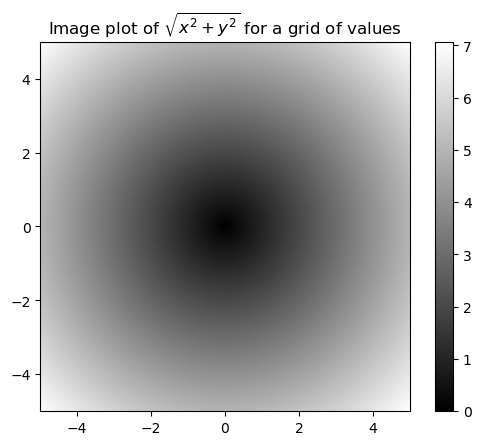

In [150]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

#### Expressing Conditional Logic as Array



The `numpy.where` function is a vectorized version of the ternary
expression `x if condition else y`. Suppose we had a Boolean array and
two arrays of values:



In [151]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from `xarr` whenever the corresponding
value in `cond` is `True`, and otherwise take the value from `yarr`. A
list comprehension doing this might look like:



In [152]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. 
- First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code).
- Second, it will not work with multidimensional arrays.

With `numpy.where` you can do this with a single function call:

In [153]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

- The second and third arguments to `numpy.where` don't need to be arrays; one or both of them can be scalars.
- A typical use of `where` in data
analysis is to produce a new array of values based on another array.

Suppose you had a matrix of randomly generated data and you wanted to
replace all positive values with 2 and all negative values with -2.
This is possible to do with `numpy.where`:



In [154]:
arr = rng.standard_normal((4, 4))
arr

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

In [155]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

You can combine scalars and arrays when using `numpy.where`. For
example, I can trim all values larger than 1 in `arr` to 1, like so:

In [156]:
np.where(arr > 1, 1, arr) # trim larger values to 1

array([[ 1.        ,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.        , -0.09296246, -0.06615089]])

#### Mathematical and Statistical



A set of mathematical functions that compute statistics about an entire
array or about the data along an axis are accessible as methods of the
array class. You can use aggregations (sometimes called *reductions*)
like `sum`, `mean`, and `std` (standard deviation) either by calling the
array instance method or using the top-level NumPy function. When you
use the NumPy function, like `numpy.sum`, you have to pass the array you
want to aggregate as the first argument.

Here I generate some normally distributed random data and compute some
aggregate statistics:



In [157]:
arr = rng.standard_normal((5, 4))
arr

array([[-1.10821447,  0.13595685,  1.34707776,  0.06114402],
       [ 0.0709146 ,  0.43365454,  0.27748366,  0.53025239],
       [ 0.53672097,  0.61835001, -0.79501746,  0.30003095],
       [-1.60270159,  0.26679883, -1.26162378, -0.07127081],
       [ 0.47404973, -0.41485376,  0.0977165 , -1.64041784]])

In [158]:
arr.mean()

-0.08719744457434529

In [159]:
np.mean(arr)

-0.08719744457434529

In [160]:
arr.sum()

-1.743948891486906

Functions like `mean` and `sum` take an optional `axis` argument that
computes the statistic over the given axis, resulting in an array with
one less dimension:



In [161]:
arr.mean(axis=1)

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

In [162]:
arr.sum(axis=0)

array([-1.62923076,  1.03990647, -0.33436331, -0.82026129])

Here, `arr.mean(axis=1)` means "compute mean across the columns," where
`arr.sum(axis=0)` means "compute sum down the rows."

Other methods like `cumsum` and `cumprod` do not aggregate, instead
producing an array of the intermediate results:



In [163]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like `cumsum` return
an array of the same size but with the partial aggregates computed along
the indicated axis according to each lower dimensional slice:



In [164]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression `arr.cumsum(axis=0)` computes the cumulative sum along
the rows, while `arr.cumsum(axis=1)` computes the sums along the
columns:



In [165]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [166]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])


| Method|Description|
|---|---|
| <code>sum</code>|Sum of all the elements in the array or along an axis; zero-length arrays have sum 0|
| <code>mean</code>|Arithmetic mean; invalid (returns <code>NaN</code>) on zero-length arrays|
| <code>std, var</code>|Standard deviation and variance, respectively|
| <code>min, max</code>|Minimum and maximum|
| <code>argmin, argmax</code>|Indices of minimum and maximum elements, respectively|
| <code>cumsum</code>|Cumulative sum of elements starting from 0|
| <code>cumprod</code>|Cumulative product of elements starting from 1|



#### Methods for Boolean



Boolean values are coerced to 1 (`True`) and 0 (`False`) in the
preceding methods. Thus, `sum` is often used as a means of counting
`True` values in a Boolean array:



In [167]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values

48

In [168]:
(arr <= 0).sum() # Number of non-positive values

52

The parentheses here in the expression `(arr > 0).sum()` are necessary
to be able to call `sum()` on the temporary result of `arr > 0`.

Two additional methods, `any` and `all`, are useful especially for
Boolean arrays. `any` tests whether one or more values in an array is
`True`, while `all` checks if every value is `True`:



In [169]:
bools = np.array([False, False, True, False])
bools.any()

True

In [170]:
bools.all()

False

These methods also work with non-Boolean arrays, where nonzero elements
are treated as `True`.



#### Sorting

Like Python's built-in list type, NumPy arrays can be sorted in place
with the `sort` method:



In [172]:
arr = rng.standard_normal(6)
arr

array([ 0.9359865 ,  1.23853712,  1.27279553,  0.40589222, -0.05032522,
        0.28931754])

In [173]:
arr.sort()
arr

array([-0.05032522,  0.28931754,  0.40589222,  0.9359865 ,  1.23853712,
        1.27279553])

You can sort each one-dimensional section of values in a
multidimensional array in place along an axis by passing the axis number
to `sort`. In this example data:



In [176]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.17930568,  1.39748056,  0.29204679],
       [ 0.63840567, -0.02788771,  1.37105185],
       [-2.05280763,  0.38050908,  0.75539067],
       [-1.15912585,  2.15031011, -0.15027022],
       [-0.16116428, -1.07944248,  0.87796618]])

`arr.sort(axis=0)` sorts the values within each column, while
`arr.sort(axis=1)` sorts across each row:



In [177]:
arr.sort(axis=0)
arr

array([[-2.05280763, -1.07944248, -0.15027022],
       [-1.15912585, -0.02788771,  0.29204679],
       [-0.16116428,  0.38050908,  0.75539067],
       [ 0.17930568,  1.39748056,  0.87796618],
       [ 0.63840567,  2.15031011,  1.37105185]])

In [178]:
arr.sort(axis=1)
arr

array([[-2.05280763, -1.07944248, -0.15027022],
       [-1.15912585, -0.02788771,  0.29204679],
       [-0.16116428,  0.38050908,  0.75539067],
       [ 0.17930568,  0.87796618,  1.39748056],
       [ 0.63840567,  1.37105185,  2.15031011]])

The top-level method `numpy.sort` returns a sorted copy of an array
(like the Python built-in function `sorted`) instead of modifying the
array in place. For example:



In [174]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

In [175]:
arr2

array([  5, -10,   7,   1,   0,  -3])

#### Unique and Other Set



NumPy has some basic set operations for one-dimensional ndarrays. A
commonly used one is `numpy.unique`, which returns the sorted unique
values in an array:



In [179]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [180]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Contrast `numpy.unique` with the pure Python alternative:



In [181]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In many cases, the NumPy version is faster and returns a NumPy array
rather than a Python list.

Another function, `numpy.in1d`, tests membership of the values in one
array in another, returning a Boolean array:



In [182]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

Here is a listing of array set operations in NumPy.


| Method|Description|
|---|---|
| <code>unique(x)</code>|Compute the sorted, unique elements in <code>x</code>|
| <code>intersect1d(x, y)</code>|Compute the sorted, common elements in <code>x</code> and <code>y</code>|
| <code>union1d(x, y)</code>|Compute the sorted union of elements|
| <code>in1d(x, y)</code>|Compute a Boolean array indicating whether each element of <code>x</code> is contained in <code>y</code>|
| <code>setdiff1d(x, y)</code>|Set difference, elements in <code>x</code> that are not in <code>y</code>|
| <code>setxor1d(x, y)</code>|Set symmetric differences; elements that are in either of the arrays, but not both|



### File Input and Output with



NumPy is able to save and load data to and from disk in some text or
binary formats.

`numpy.save` and `numpy.load` are the two workhorse functions for
efficiently saving and loading array data on disk. Arrays are saved by
default in an uncompressed raw binary format with file extension *.npy*:



In [183]:
arr = np.arange(10)
np.save("some_array", arr)

If the file path does not already end in *.npy*, the extension will be
appended. The array on disk can then be loaded with `numpy.load`:



In [184]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can save multiple arrays in an uncompressed archive using
`numpy.savez` and passing the arrays as keyword arguments:



In [185]:
np.savez("array_archive.npz", a=arr, b=arr)

When loading an *.npz* file, you get back a dictionary-like object that
loads the individual arrays lazily:



In [187]:
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use
`numpy.savez_compressed` instead:



In [186]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

### Linear Algebra



Linear algebra operations, like matrix multiplication, decompositions,
determinants, and other square matrix math, are an important part of
many array libraries. Multiplying two two-dimensional arrays with `*` is
an element-wise product, while matrix multiplications require either
using the `dot` function or the `@` infix operator. `dot` is both an
array method and a function in the `numpy` namespace for doing matrix
multiplication:



In [188]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [189]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [190]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`x.dot(y)` is equivalent to `np.dot(x, y)`:



In [191]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized
one-dimensional array results in a one-dimensional array:



In [192]:
x @ np.ones(3)

array([ 6., 15.])

`numpy.linalg` has a standard set of matrix decompositions and things
like inverse and determinant:



In [193]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
X

array([[ 0.22446741, -0.59159345,  0.2262628 ,  0.68618251,  1.21500461],
       [ 0.21605944, -0.96482356, -0.5566078 , -2.29838764, -0.73208213],
       [ 0.7364691 ,  0.46571672, -0.10787605, -0.34143629,  1.58453379],
       [ 0.28224121,  0.90954639,  0.39507157, -0.66937652,  1.55536898],
       [-1.23813903, -1.19617346, -0.42914951, -0.72965989, -0.5574689 ]])

In [194]:
mat = X.T @ X
inv(mat)

array([[ 0.91814187, -0.40683297,  0.37773807,  0.05881724, -0.22969713],
       [-0.40683297,  0.84336329, -1.50553592,  0.090501  ,  0.07547597],
       [ 0.37773807, -1.50553592,  7.56080134, -1.1143631 , -0.75999498],
       [ 0.05881724,  0.090501  , -1.1143631 ,  0.34915144,  0.09062418],
       [-0.22969713,  0.07547597, -0.75999498,  0.09062418,  0.31130904]])

In [195]:
mat @ inv(mat)

array([[ 1.00000000e+00,  1.40762046e-16,  9.23936972e-16,
        -2.85567311e-16, -2.27043017e-16],
       [ 1.19679973e-16,  1.00000000e+00,  1.44736058e-15,
        -2.04705780e-16, -2.65681647e-16],
       [-5.24818882e-17,  4.78163370e-17,  1.00000000e+00,
         9.55847249e-17,  5.88300391e-17],
       [-7.22998142e-17,  1.19513881e-16,  9.12119963e-16,
         1.00000000e+00, -1.20707445e-16],
       [-1.06205429e-16,  4.21925437e-16,  8.81085547e-16,
        -2.81999220e-17,  1.00000000e+00]])

The expression `X.T.dot(X)` computes the dot product of `X` with its
transpose `X.T`.

Here is a list of some of the most commonly used linear algebra functions.


| Function|Description|
|---|---|
| <code>diag</code>|Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal|
| <code>dot</code>|Matrix multiplication|
| <code>trace</code>|Compute the sum of the diagonal elements|
| <code>det</code>|Compute the matrix determinant|
| <code>eig</code>|Compute the eigenvalues and eigenvectors of a square matrix|
| <code>inv</code>|Compute the inverse of a square matrix|
| <code>pinv</code>|Compute the Moore-Penrose pseudoinverse of a matrix|
| <code>qr</code>|Compute the QR decomposition|
| <code>svd</code>|Compute the singular value decomposition (SVD)|
| <code>solve</code>|Solve the linear system Ax = b for x, where A is a square matrix|
| <code>lstsq</code>|Compute the least-squares solution to <code>Ax = b</code>|

